<a href="https://colab.research.google.com/github/Tasyadj874/Tasya/blob/main/Tiktok.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Import Library

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


##Upload & Baca Dataset

Dalam analisis ini, saya menggunakan dataset "Top 100 TikTokers 2025" dari Kaggle. Tujuan analisis ini adalah untuk mengelompokkan para TikTokers berdasarkan karakteristik mereka seperti jumlah followers, following, uploads, dan likes menggunakan metode Unsupervised Learning yaitu **K-Means Clustering**. Dengan klasterisasi ini, saya ingin menemukan pola-pola tersembunyi dan memberikan rekomendasi strategi yang sesuai untuk tiap kelompok influencer.


In [4]:
from google.colab import files
uploaded = files.upload()

# Baca file CSV
df = pd.read_csv('Top 100 Tiktokers 2025.csv')
df.head()


Saving Top 100 Tiktokers 2025.csv to Top 100 Tiktokers 2025.csv


,Rank,Username,Followers,Following,Uploads,Likes
0,1,Khabane lame,162400000,78,1251,2500000000
1,2,charli d'amelio,155700000,1304,2812,11800000000
2,3,MrBeast,107500000,362,394,1100000000
3,4,Bella Poarch,94300000,649,771,2400000000
4,5,Addison Rae,88500000,1,318,5200000000


##Eksplorasi & Praproses Data

Langkah pertama adalah mengeksplorasi isi dataset dan membersihkan data. Saya hanya memilih kolom-kolom numerik yang relevan seperti jumlah followers, following, uploads, dan likes. Saya juga memastikan tidak ada nilai kosong (null) yang dapat mengganggu proses analisis.

In [5]:
df.info()
df.describe()

# Cek null values
print(df.isnull().sum())

selected_features = ['Followers', 'Following', 'Uploads', 'Likes']
df_clean = df[selected_features].dropna()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Rank       100 non-null    int64 
 1   Username   100 non-null    object
 2   Followers  100 non-null    int64 
 3   Following  100 non-null    int64 
 4   Uploads    100 non-null    int64 
 5   Likes      100 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 4.8+ KB
Rank         0
Username     0
Followers    0
Following    0
Uploads      0
Likes        0
dtype: int64


##Standarisasi Data

Karena setiap fitur memiliki skala yang berbeda (followers bisa puluhan juta, likes bisa miliaran, dan uploads mungkin ratusan), saya melakukan normalisasi menggunakan `StandardScaler` agar semua fitur memiliki skala yang seimbang sebelum dilakukan klasterisasi.


In [6]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_clean)

##Menentukan Jumlah Klaster (Elbow Method)

Untuk menentukan jumlah klaster yang optimal, saya menggunakan metode elbow. Grafik inertia digunakan untuk mencari 'elbow point', yaitu titik di mana penurunan inertia mulai melambat secara signifikan.


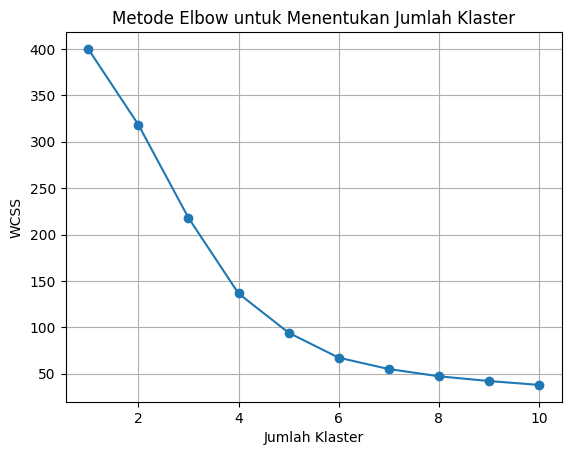

In [7]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title('Metode Elbow untuk Menentukan Jumlah Klaster')
plt.xlabel('Jumlah Klaster')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()


##K-Means Clustering

Saya menggunakan algoritma K-Means untuk membagi data ke dalam 3 klaster berdasarkan kesamaan nilai-nilai numerik yang telah dinormalisasi sebelumnya. Label klaster ditambahkan ke dalam dataframe.


In [8]:
# Misalnya hasil elbow optimal di 3 klaster
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Tambahkan kolom cluster ke data asli
df_clean['Cluster'] = clusters


##Visualisasi Klaster
Saya menambahkan visualisasi dua dimensi menggunakan scatter plot berdasarkan fitur Followers dan Likes untuk melihat distribusi klaster secara visual.


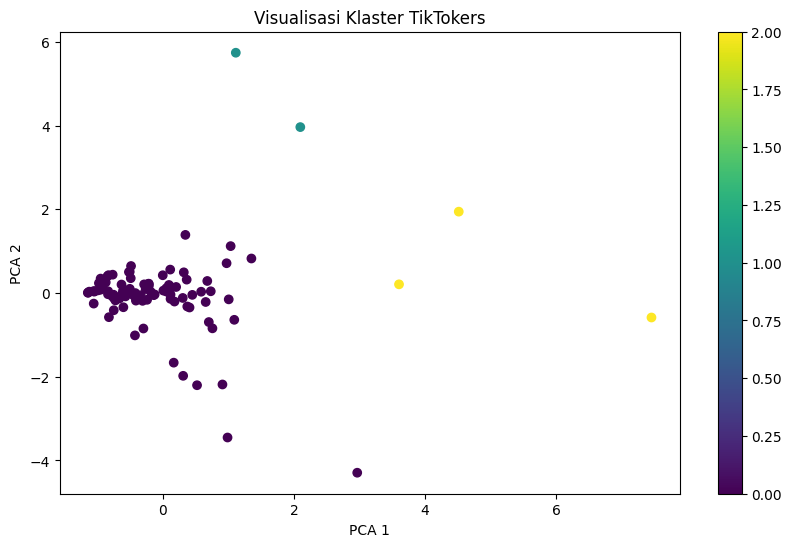

In [9]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

plt.figure(figsize=(10,6))
plt.scatter(pca_result[:,0], pca_result[:,1], c=clusters, cmap='viridis')
plt.title('Visualisasi Klaster TikTokers')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar()
plt.show()


## Interpretasi Klaster
Setelah membagi data ke dalam 3 klaster, saya menghitung rata-rata tiap fitur dalam setiap klaster. Dengan begitu, kita bisa memahami karakteristik umum tiap klaster, seperti:
- Cluster 0: Followers menengah, following cukup banyak, dan likes cukup tinggi.
- Cluster 1: Followers sedikit, following sangat rendah, namun likes cukup tinggi (mungkin niche atau viral akun).
- Cluster 2: Followers sangat tinggi, likes sangat besar, unggahan banyak — kemungkinan akun-akun besar yang sangat populer.


In [10]:
# Rata-rata tiap fitur di setiap klaster
cluster_summary = df_clean.groupby('Cluster').mean()
print(cluster_summary)


            Followers   Following       Uploads         Likes
Cluster                                                      
0        4.720947e+07  844.978947   1779.863158  1.374929e+09
1        5.601000e+08   75.500000   3456.500000  1.950000e+09
2        8.263333e+07  986.666667  13794.333333  8.800000e+09


##Kesimpulan & Rekomendasi
Berdasarkan hasil klasterisasi:
- **Cluster 2** cocok dijadikan influencer brand besar karena punya banyak followers dan likes.
- **Cluster 1** lebih cocok untuk kolaborasi dengan brand atau konten viral jangka pendek.
- **Cluster 0** potensial untuk ditingkatkan engagement-nya karena follower cukup banyak.

Rekomendasi:
- Untuk brand besar, fokus pada influencer dari Cluster 2.
- Untuk campaign eksperimental atau produk niche, coba Cluster 1.
- Cluster 0 bisa diberi program peningkatan konten agar lebih viral.
